In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pickle

In [2]:
df = pd.read_csv("/content/TASK-ML-INTERN.csv")

In [3]:
df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB


In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

,0
hsi_id,0
0,0
1,0
2,0
3,0
...,...
444,0
445,0
446,0
447,0


In [8]:
df.shape

(500, 450)

In [9]:
X = df.iloc[:, 1:-1].values
y = df['vomitoxin_ppb'].values

In [10]:
X

array([[0.41618118, 0.39684365, 0.40898487, ..., 0.71136944, 0.69767889,
        0.7045196 ],
       [0.41579684, 0.40295639, 0.40256357, ..., 0.69692056, 0.69654401,
        0.68905392],
       [0.38902334, 0.37120555, 0.37309768, ..., 0.65894515, 0.6709893 ,
        0.66517639],
       ...,
       [0.48652606, 0.50137243, 0.50017548, ..., 0.77031393, 0.76332389,
        0.79718723],
       [0.46459495, 0.49882201, 0.4890769 , ..., 0.75354539, 0.7496192 ,
        0.75638268],
       [0.46084036, 0.45765625, 0.43463187, ..., 0.70761068, 0.72948366,
        0.71870559]])

In [11]:
y

array([1.100e+03, 1.000e+03, 1.300e+03, 1.300e+03, 2.200e+02, 1.400e+03,
       1.100e+03, 5.000e+02, 1.000e+02, 1.100e+03, 0.000e+00, 8.900e+03,
       2.000e+02, 1.000e+03, 1.000e+02, 5.000e+02, 3.000e+02, 1.200e+03,
       4.800e+03, 0.000e+00, 3.000e+02, 1.200e+03, 3.700e+03, 5.100e+02,
       3.000e+02, 1.000e+03, 2.000e+02, 1.300e+03, 9.000e+02, 4.100e+02,
       4.000e+02, 4.500e+02, 0.000e+00, 0.000e+00, 5.000e+02, 0.000e+00,
       0.000e+00, 1.800e+04, 4.300e+03, 3.700e+02, 6.000e+02, 5.000e+02,
       1.000e+02, 1.300e+03, 5.000e+02, 5.200e+02, 6.000e+02, 0.000e+00,
       2.200e+03, 0.000e+00, 5.300e+03, 1.000e+02, 2.000e+02, 4.800e+03,
       0.000e+00, 3.400e+02, 2.000e+02, 9.000e+02, 7.900e+03, 0.000e+00,
       4.100e+02, 5.000e+02, 2.900e+03, 1.800e+02, 2.900e+03, 1.280e+04,
       2.400e+03, 9.000e+02, 3.000e+02, 4.000e+02, 2.000e+02, 2.100e+03,
       0.000e+00, 4.400e+03, 1.400e+03, 1.000e+03, 6.300e+02, 3.000e+02,
       2.000e+02, 8.000e+01, 8.690e+04, 5.200e+03, 

In [12]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

In [14]:
X_scaled

array([[0.42838447, 0.43229378, 0.51048466, ..., 0.37623389, 0.34056165,
        0.35953716],
       [0.42681641, 0.45832242, 0.48424421, ..., 0.3355338 , 0.33735936,
        0.32043883],
       [0.31758383, 0.32312432, 0.36383262, ..., 0.22856342, 0.26525161,
        0.26007477],
       ...,
       [0.71538286, 0.87738727, 0.88313265, ..., 0.54227065, 0.52579219,
        0.59380736],
       [0.62590663, 0.86652731, 0.83777859, ..., 0.49503649, 0.48712167,
        0.49065062],
       [0.61058839, 0.69123962, 0.61529042, ..., 0.36564608, 0.4303052 ,
        0.39540032]])

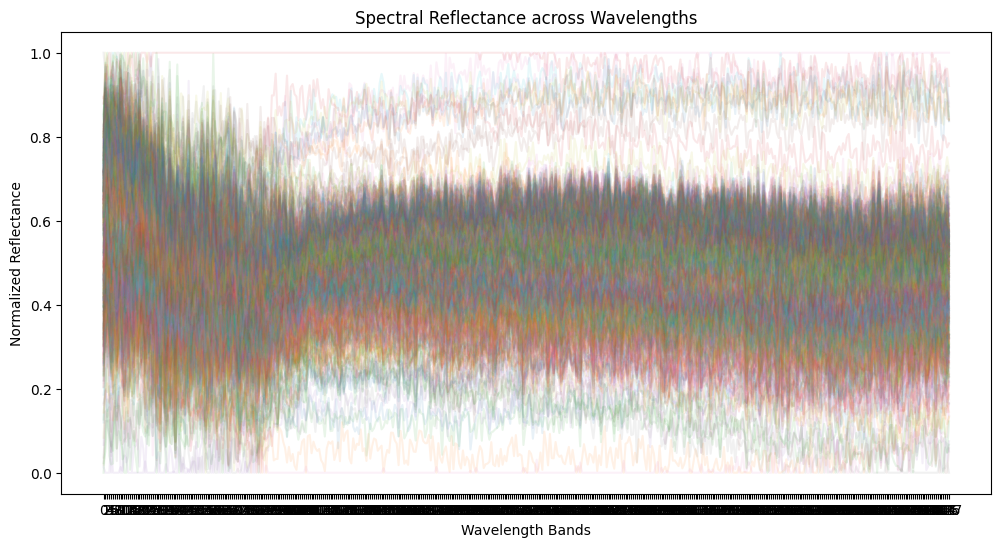

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df.columns[1:-1], X_scaled.T, alpha=0.1)
plt.xlabel('Wavelength Bands')
plt.ylabel('Normalized Reflectance')
plt.title('Spectral Reflectance across Wavelengths')
plt.show()

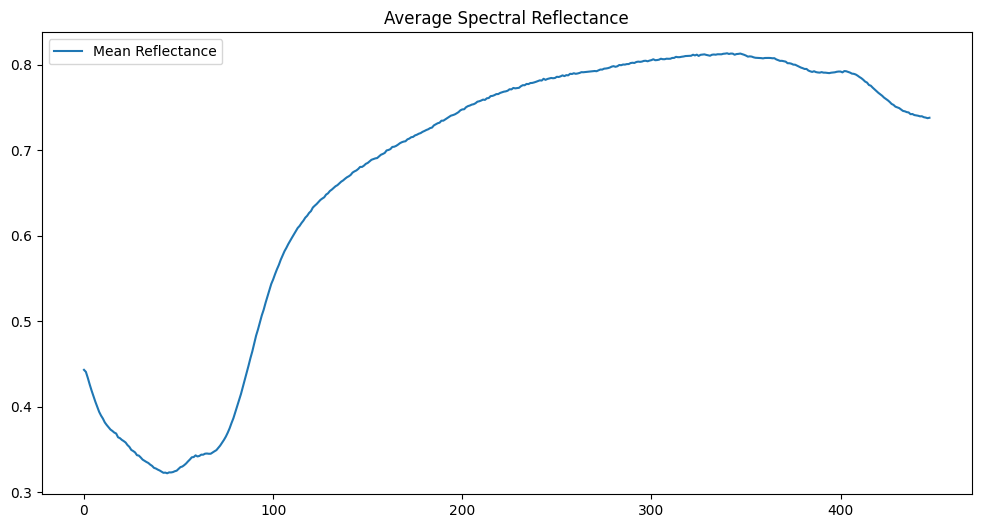

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(X.mean(axis=0), label="Mean Reflectance")
plt.title("Average Spectral Reflectance")
plt.legend()
plt.show()

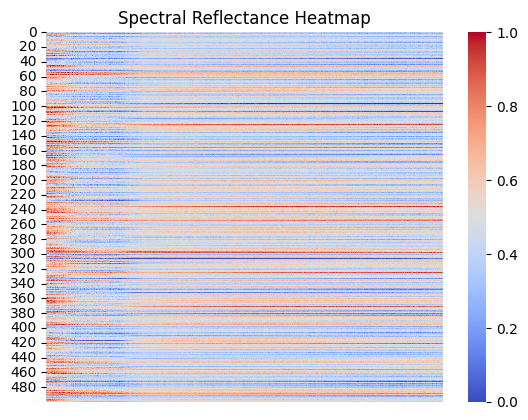

In [17]:
sns.heatmap(X_scaled, cmap="coolwarm", xticklabels=False)
plt.title("Spectral Reflectance Heatmap")
plt.show()

Optimal number of PCA components: 4


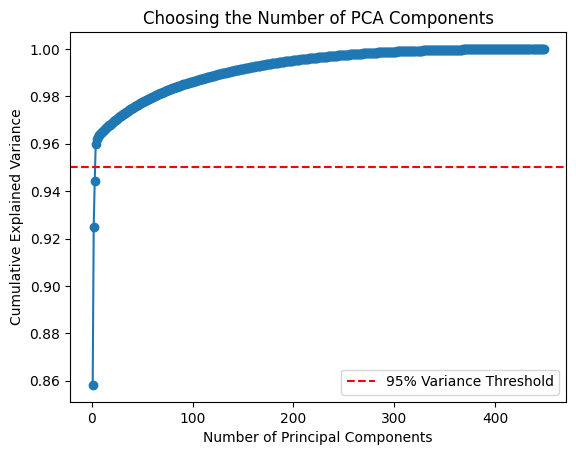

Explained variance ratio: [0.8582386  0.06683037 0.01916925 0.01566534]


In [18]:
pca = PCA().fit(X_scaled)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

optimal_components = np.argmax(explained_variance >= 0.95) + 1

print(f'Optimal number of PCA components: {optimal_components}')

plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Choosing the Number of PCA Components')
plt.legend()
plt.show()

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)
print("Explained variance ratio:", pca.explained_variance_ratio_)

In [19]:
with open("pca.pkl", "wb") as pca_file:
    pickle.dump(pca, pca_file)

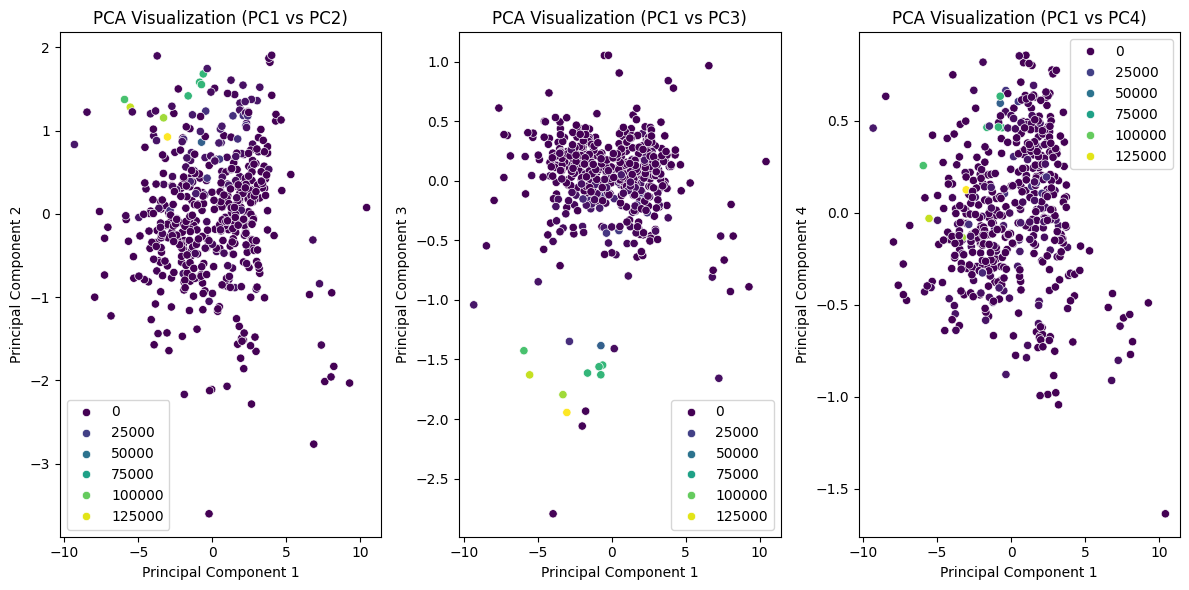

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(12, 6))

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', ax=ax[0])
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')
ax[0].set_title('PCA Visualization (PC1 vs PC2)')

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 2], hue=y, palette='viridis', ax=ax[1])
ax[1].set_xlabel('Principal Component 1')
ax[1].set_ylabel('Principal Component 3')
ax[1].set_title('PCA Visualization (PC1 vs PC3)')

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 3], hue=y, palette='viridis', ax=ax[2])
ax[2].set_xlabel('Principal Component 1')
ax[2].set_ylabel('Principal Component 4')
ax[2].set_title('PCA Visualization (PC1 vs PC4)')

plt.tight_layout()
plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_test = y_scaler.transform(y_test.reshape(-1, 1))

In [23]:
with open("y_scaler.pkl", "wb") as y_scaler_file:
    pickle.dump(y_scaler, y_scaler_file)

In [24]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16, verbose=1)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, RMSE: {rmse}, R² Score: {r2}")

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0584 - mae: 0.1425 - val_loss: 0.0098 - val_mae: 0.0560
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0056 - mae: 0.0402 - val_loss: 0.0050 - val_mae: 0.0379
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mae: 0.0310 - val_loss: 0.0050 - val_mae: 0.0309
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0045 - mae: 0.0263 - val_loss: 0.0040 - val_mae: 0.0251
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0025 - mae: 0.0209 - val_loss: 0.0029 - val_mae: 0.0263
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0027 - mae: 0.0233 - val_loss: 0.0032 - val_mae: 0.0291
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - mae: 0.0221 - val_loss: 0.0024 - val_mae: 0.0285
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013 - mae: 0.0188 - val_loss: 0.0024 - val_mae: 0.0257
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.00

In [25]:
model.save("neural_net.h5")

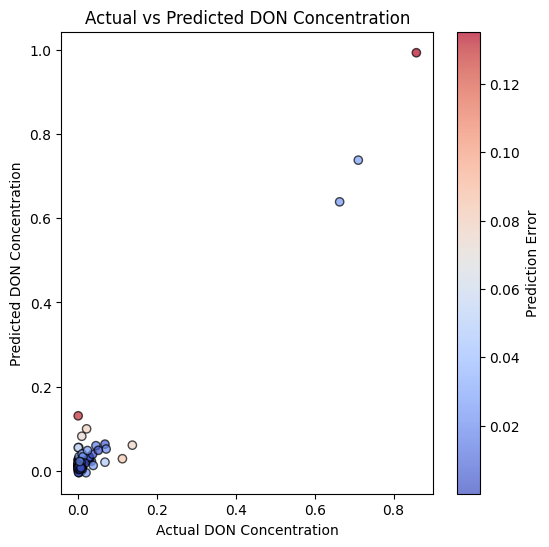

In [26]:
import matplotlib.pyplot as plt
import numpy as np

errors = np.abs(y_test - y_pred)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, c=errors, cmap='coolwarm', alpha=0.7, edgecolors='k')
plt.colorbar(label="Prediction Error")
plt.xlabel('Actual DON Concentration')
plt.ylabel('Predicted DON Concentration')
plt.title('Actual vs Predicted DON Concentration')
plt.show()
